# Contrast

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv.imread("lena.png",0)

In [3]:
alpha = 1.5
beta = 0
new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

alpha2 = 2
beta2 = 0
new_image2 = cv.convertScaleAbs(image, alpha=alpha2, beta=beta2)


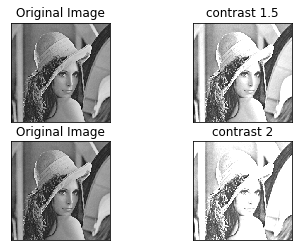

In [4]:
titles = ['Original Image','contrast 1.5','Original Image','contrast 2']
images = [image, new_image ,image ,new_image2]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

# Sobel

In [5]:

def Convolution(image_region,kernel):
    """convolution operator"""
    row1total = image_region[0,1]*kernel[0,1] + image_region[0,2]*kernel[0,2] + image_region[0,0]*kernel[0,0]
    row2total = image_region[1,1]*kernel[1,1] + image_region[1,2]*kernel[1,2] + image_region[1,0]*kernel[1,0]
    row3total = image_region[2,1]*kernel[2,1] + image_region[2,2]*kernel[2,2] + image_region[2,0]*kernel[2,0]
    return row1total + row2total + row3total

def RegionOfInterest(inputimg,i,j):
    """create region of interest to convolute with the mask"""
    image = np.zeros((3,3))
    a = i
    b = j
    for k in range(0,3):
        b = j
        for l in range(0,3):
            image[k,l] = inputimg[a,b]
            b = b+1
        a = a +1
    return image


def Xgradient(inputimg):
    """return an image after Xgradient filtering"""
    rows = len(inputimg)
    cols = len(inputimg[0])
    Gx = np.array(np.mat('1 0 -1; 2 0 -2; 1 0 -1'))
    outputimg = np.zeros((rows,cols))
    for i in range(0,rows-3):
         for j in range(0,cols-3):
             # retreve the part of image of 3 x 3 dimension from inputimage
             image_region  = RegionOfInterest (inputimg, i, j)
             outputimg[i,j] = Convolution(image_region, Gx)
    return outputimg

def Ygradient(inputimg):
    """return an image after Xgradient filtering"""
    rows = len(inputimg)
    cols = len(inputimg[0])
    #print(rows,cols)
    Gy = np.array(np.mat('1 2 1; 0 0 0; -1 -2 -1'))
    outputimg = np.zeros((rows,cols))
    for i in range(0,rows-3):
         for j in range(0,cols-3):
             # retreve the part of image of 3 x 3 dimension from inputimage
             image  = RegionOfInterest (inputimg, i, j)
             outputimg[i,j] = Convolution(image,Gy)
    return outputimg

def Gradient(sobelimagex,sobelimagey,rows,cols):
    outputimg = np.zeros([rows, cols])
    for i in range(0,rows):
        for j in range(0,cols):
            outputimg[i,j] = abs(sobelimagex[i, j]) + abs(sobelimagey[i, j])
    return outputimg




inputimg = cv.imread('lena.png',0)
rows= len(inputimg)
cols = len(inputimg[0])


sobelimagex = Xgradient(inputimg)
sobelimagey = Ygradient(inputimg)
outputimg = Gradient(sobelimagex,sobelimagey,rows,cols)


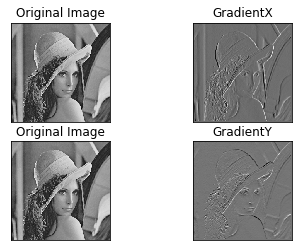

In [6]:
titles = ['Original Image','GradientX','Original Image','GradientY']
images = [image, sobelimagex , image , sobelimagey]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

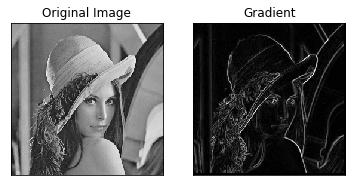

In [7]:
titles = ['Original Image','Gradient']
images = [image , outputimg]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

# IMPLEMENTING SOBEL GAUSSIAN FILTER WITH OpenCV

In [8]:
img=cv.imread("lena.png", 0)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

We are now ready to work with image gradient that is a directional change in the intensity color of an image. So it is particularly useful when we want to find edges of objects into the image. So let's dive into the Sobel gradient representation

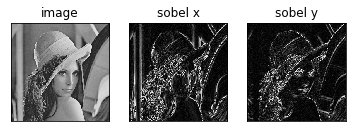

<Figure size 2160x1440 with 0 Axes>

In [9]:
sobel_x=cv.Sobel(img, cv.CV_64F, 1, 0) # 1 for the sobel x method, so the Dx method ( x-direction)
sobel_y=cv.Sobel(img, cv.CV_64F, 0, 1) #the inverse of the above

sobel_x=np.uint8(np.absolute(sobel_x))
sobel_y=np.uint8(np.absolute(sobel_y))


titles=['image', 'sobel x', 'sobel y']
images=[img, sobel_x, sobel_y]
for i in range(3):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.figure(figsize=(30,20))
plt.show()

From the above output we can figure out how the intesnity of the color change along the x direction and y direction rispectively. 
Now we can combine bot the x derivative and y derivative:

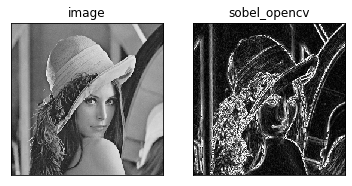

<Figure size 1440x720 with 0 Axes>

In [10]:
sobel_opencv=cv.bitwise_or(sobel_x, sobel_y)

titles=['image', 'sobel_opencv']
images=[img, sobel_opencv]
for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,10))
plt.show()

# Evaluate the two sobel algorithm



In [11]:
diff=outputimg-sobel_opencv
print(diff)
cv.imshow('diff', diff)
cv.waitKey(0)
cv.destroyAllWindows()

[[  24.   -8.   16. ...  -16. -176.    0.]
 [  12.  -12.    8. ... -111. -254. -218.]
 [   4.    4.    8. ... -222. -251. -150.]
 ...
 [ -20.  -24.  -24. ...  -78.  -86.  -52.]
 [ -12.   -8.  -12. ... -122.  -58.  -60.]
 [   0.  -12.   -4. ...  -72.  -12.    0.]]


# come la interpretiamo??? Ha senso un'operazione di visualizzazione del genere?

In [15]:
flat=diff.flatten()

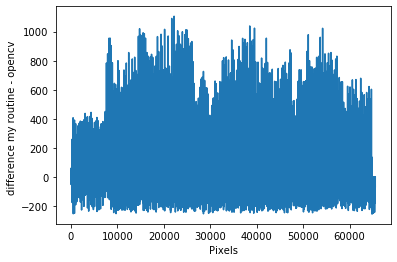

<Figure size 1440x1440 with 0 Axes>

In [20]:
x=range(len(flat))
y= flat
plt.xlabel('Pixels')
plt.ylabel('difference my routine - opencv ')
plt.plot(x,y)
plt.figure(figsize=(20,20))
plt.show()